In [1]:
! wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2023-09-24 11:40:54--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 2607:f8b0:4023:c0d::cf
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   253MB/s    in 0.6s    

2023-09-24 11:40:55 (253 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]

--2023-09-24 11:40:55--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/helper_functions.py
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53995 (53K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[=======

In [6]:
! wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py


--2023-09-24 11:45:56--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-09-24 11:45:56 (39.5 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [12]:
helper_functions="/content/helper_functions.py"
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [13]:
unzip_data("/content/10_food_classes_10_percent.zip")

In [14]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ch

In [18]:
train_dir="/content/10_food_classes_10_percent/train"
test_dir="/content/10_food_classes_10_percent/test"
import tensorflow as tf

In [20]:
train_data_10=tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                  batch_size=32,
                                                                  image_size=(244,244),
                                                                  label_mode="categorical"
                                                                  )

test_data_10=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                  batch_size=32,
                                                                  image_size=(244,244),
                                                                  label_mode="categorical"
                                                                  )



Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


# creating a data augmentation layer

In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation=keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomWidth(0.2),
    layers.RandomHeight(0.2),
],name="data_augmentation")

# creating a model

In [42]:
base_model=tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable=False

inputs=layers.Input(shape=(244,244,3),name="input_layer")

x=data_augmentation(inputs)

x=base_model(x,training=False)

x=layers.GlobalAveragePooling2D(name="GlobalAveragePooling2D")(x)

outputs=layers.Dense(10,activation="softmax",name="output_layer")(x)

model_1=keras.Model(inputs,outputs)

model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")


In [43]:
# Setup checkpoint path
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt" # note: remember saving directly to Colab is temporary

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True, # set to False to save the entire model
                                                         save_best_only=True, # save only the best model weights instead of a model every epoch
                                                         save_freq="epoch", # save every epoch
                                                         verbose=1)

In [44]:
# Fit the model saving checkpoints every epoch
initial_epochs = 5
history_10_percent_data_aug = model_1.fit(train_data_10,
                                          epochs=initial_epochs,
                                          validation_data=test_data_10,
                                          validation_steps=int(0.25 * len(test_data_10)), # do less steps per validation (quicker)
                                          callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_data_aug"),
                                                     checkpoint_callback])


Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20230924-124535
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.0040 - accuracy: 0.3320
Epoch 1: val_loss improved from inf to 1.48945, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 58s 862ms/step - loss: 2.0040 - accuracy: 0.3320 - val_loss: 1.4895 - val_accuracy: 0.6612
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3807 - accuracy: 0.6560
Epoch 2: val_loss improved from 1.48945 to 1.04486, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 17s 661ms/step - loss: 1.3807 - accuracy: 0.6560 - val_loss: 1.0449 - val_accuracy: 0.7681
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0802 - accuracy: 0.7560
Epoch 3: val_loss improved from 1.04486 to 0.82212, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [=

### we will fine tune the model by making the last 10 layer of the efficientnet model trainable

In [45]:
base_model_layer=model_1.layers[2]

base_model_layer.trainable=True

for layer in base_model_layer.layers[:-10]:
  layer.trainable=False

In [46]:
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics="accuracy")

In [47]:
fine_tune_epochs = initial_epochs + 5

# Refit the model (same as model_2 except with more trainable layers)
history_fine_10_percent_data_aug = model_1.fit(train_data_10,
                                               epochs=fine_tune_epochs,
                                               validation_data=test_data_10,
                                               initial_epoch=history_10_percent_data_aug.epoch[-1], # start from previous last epoch
                                               validation_steps=int(0.25 * len(test_data_10)),
                                               callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                                      experiment_name="10_percent_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20230924-125200
Epoch 5/10
24/24 [==============================] - 29s 746ms/step - loss: 0.6921 - accuracy: 0.8253 - val_loss: 0.5166 - val_accuracy: 0.8405
Epoch 6/10
24/24 [==============================] - 16s 681ms/step - loss: 0.5672 - accuracy: 0.8333 - val_loss: 0.4726 - val_accuracy: 0.8536
Epoch 7/10
24/24 [==============================] - 15s 603ms/step - loss: 0.5354 - accuracy: 0.8387 - val_loss: 0.4476 - val_accuracy: 0.8618
Epoch 8/10
24/24 [==============================] - 14s 552ms/step - loss: 0.5212 - accuracy: 0.8360 - val_loss: 0.4467 - val_accuracy: 0.8586
Epoch 9/10
24/24 [==============================] - 15s 575ms/step - loss: 0.4624 - accuracy: 0.8600 - val_loss: 0.4178 - val_accuracy: 0.8470
Epoch 10/10
24/24 [==============================] - 14s 561ms/step - loss: 0.4209 - accuracy: 0.8707 - val_loss: 0.4286 - val_accuracy: 0.8602


In [49]:
import matplotlib.pyplot as plt


def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two model history objects.
    """
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

5
11
[0.3319999873638153, 0.656000018119812, 0.7559999823570251, 0.7786666750907898, 0.8133333325386047, 0.8253333568572998, 0.8333333134651184, 0.8386666774749756, 0.8360000252723694, 0.8600000143051147, 0.8706666827201843]


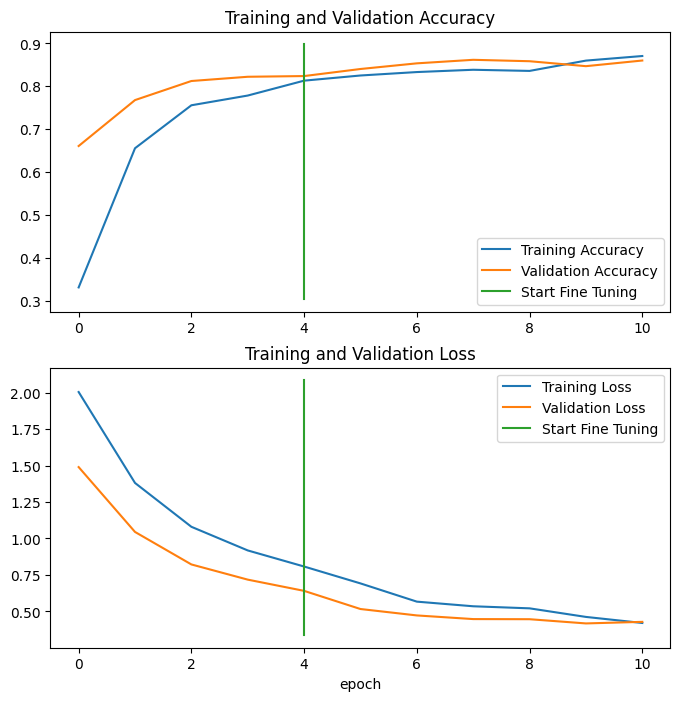

In [50]:
compare_historys(original_history=history_10_percent_data_aug,
                 new_history=history_fine_10_percent_data_aug,
                 initial_epochs=5)

# model with all the 10 classes and all the data

In [51]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data("10_food_classes_all_data.zip")

# Setup data directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

--2023-09-24 13:24:18--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 74.125.137.207, 2607:f8b0:4023:c0d::cf
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  42.5MB/s    in 10s     

2023-09-24 13:24:29 (47.8 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [52]:
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 

In [53]:
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                 label_mode="categorical",
                                                                                 image_size=IMG_SIZE)

# Note: this is the same test dataset we've been using for the previous modelling experiments
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [54]:
model_1.evaluate(test_data_10)

79/79 [==============================] - 10s 112ms/step - loss: 0.4159 - accuracy: 0.8616


[0.41592642664909363, 0.8615999817848206]

In [58]:
def create_base_model(input_shape: tuple[int, int, int] = (224, 224, 3),
                      output_shape: int = 10,
                      learning_rate: float = 0.001,
                      training: bool = False) -> tf.keras.Model:
    """
    Create a model based on EfficientNetV2B0 with built-in data augmentation.

    Parameters:
    - input_shape (tuple): Expected shape of input images. Default is (224, 224, 3).
    - output_shape (int): Number of classes for the output layer. Default is 10.
    - learning_rate (float): Learning rate for the Adam optimizer. Default is 0.001.
    - training (bool): Whether the base model is trainable. Default is False.

    Returns:
    - tf.keras.Model: The compiled model with specified input and output settings.
    """

    # Create base model
    base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
    base_model.trainable = training

    # Setup model input and outputs with data augmentation built-in
    inputs = layers.Input(shape=input_shape, name="input_layer")
    x = data_augmentation(inputs)
    x = base_model(x, training=False)  # pass augmented images to base model but keep it in inference mode
    x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
    outputs = layers.Dense(units=output_shape, activation="softmax", name="output_layer")(x)
    model = tf.keras.Model(inputs, outputs)

    # Compile model
    model.compile(loss="categorical_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  metrics=["accuracy"])

    return model

In [59]:
model_1 = create_base_model(learning_rate=0.0001)

In [60]:
# loading weights from the checkpoint from model 1 where it is not fine tuned

model_1.load_weights(checkpoint_path)

In [62]:
model_1.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                1281

In [67]:
for layer_number, layer in enumerate(model_1.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetv2-b0 False
3 global_average_pooling_layer True
4 output_layer True


In [69]:

# Unfreeze the top 10 layers in model_2's base_model
model_1_base_model = model_1.layers[2]
model_1_base_model.trainable = True

# Freeze all layers except for the last 10
for layer in model_1_base_model.layers[:-10]:
  layer.trainable = False

In [71]:

# Check which layers are tuneable in the base model
for layer_number, layer in enumerate(model_1_base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_6 False
1 rescaling_5 False
2 normalization_5 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 

In [73]:
# Recompile the model (always recompile after any adjustments to a model)
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # lr is 10x lower than before for fine-tuning
                metrics=["accuracy"])

In [74]:
fine_tune_epochs = initial_epochs + 5

history_fine_10_classes_full = model_1.fit(train_data_10_classes_full,
                                           epochs=fine_tune_epochs,
                                           initial_epoch=history_10_percent_data_aug.epoch[-1],
                                           validation_data=test_data,
                                           validation_steps=int(0.25 * len(test_data)),
                                           callbacks=[create_tensorboard_callback("transfer_learning", "full_10_classes_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/full_10_classes_fine_tune_last_10/20230924-134029
Epoch 5/10
235/235 [==============================] - 107s 410ms/step - loss: 0.7233 - accuracy: 0.7635 - val_loss: 0.3220 - val_accuracy: 0.9079
Epoch 6/10
235/235 [==============================] - 77s 326ms/step - loss: 0.5942 - accuracy: 0.8093 - val_loss: 0.2585 - val_accuracy: 0.9211
Epoch 7/10
235/235 [==============================] - 64s 272ms/step - loss: 0.5453 - accuracy: 0.8259 - val_loss: 0.2599 - val_accuracy: 0.9095
Epoch 8/10
235/235 [==============================] - 59s 250ms/step - loss: 0.5017 - accuracy: 0.8384 - val_loss: 0.2631 - val_accuracy: 0.9145
Epoch 9/10
235/235 [==============================] - 55s 232ms/step - loss: 0.4834 - accuracy: 0.8441 - val_loss: 0.2308 - val_accuracy: 0.9309
Epoch 10/10
235/235 [==============================] - 53s 224ms/step - loss: 0.4552 - accuracy: 0.8509 - val_loss: 0.2167 - val_accuracy: 0.9227


In [77]:
results_fine_tune_full_data = model_1.evaluate(test_data)
results_fine_tune_full_data


79/79 [==============================] - 6s 66ms/step - loss: 0.2521 - accuracy: 0.9180


[0.2520943284034729, 0.9179999828338623]